## Univariate Linear regression
Univariate linear regression is a simple and commonly used statistical technique for modeling the relationship between a dependent variable and an independent variable. The goal of univariate linear regression is to fit a line (a linear model) to the data that best represents the relationship between the dependent and independent variables. The line is represented by an equation, which can be used to predict the dependent variable given a specific value of the independent variable. Univariate linear regression can be applied when the relationship between the variables is assumed to be linear. The method involves finding the line of best fit, which is determined by minimizing the sum of the squares of the residuals (differences between the observed and predicted values of the dependent variable). The line of best fit can be used to make predictions and make inferences about the underlying relationship between the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('Bangalore.csv')
train_x = data.Area.to_numpy()/1000    # area as feature
train_y = data.Price.to_numpy()/1000000    # price as target (converted to lakhs)

Text(0.5, 1.0, "Bangalore's Real Estate")

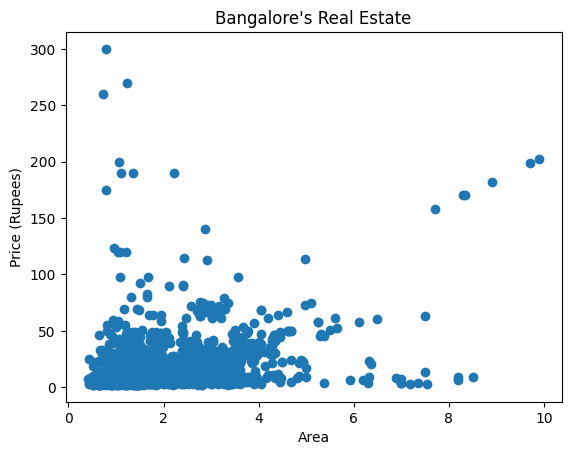

In [3]:
#%% plotting raw data
plt.scatter(train_x, train_y)
plt.xlabel('Area')
plt.ylabel('Price (Rupees)')
plt.title("Bangalore's Real Estate" )

### prediction function
We need to derive a function $f(w,b)$ where $f(w,b) = w*x + b$   
here, $w$ is the weight and $b$ is the bias.  
This function predicts the value of y (price) for a given x (floor size)

In [4]:
#%% derived function
def predicted_y(x):
    '''
    
    Parameters
    ----------
    x : float
        DESCRIPTION - x_train or x_test in this case

    Returns
    -------
    y : float
        DESCRIPTION - predicted y based on x

    '''
    f = w*x + b
    return f

### cost function
In order to minimize our prediction error, a cost function is used,  
$$J(w,b) = \frac{1}{2m}\sum_{i=0}^{m-1}  (f_{w,b}(x^i) - y^i)$$  
This cost function calculates the prediction error - error between the predicted value and the training value.  

In [5]:
#%% compute cost
def compute_cost(x,y,w_in,b_in):
    '''
    x : train_x
    y : train_y
    w_in,b_in : model parameters

    Returns
    -------
    cost for a given w and b

    '''
    cost = 0
    m = train_x.shape[0]
    for i in range(m):
        f_i = w_in*x[i] + b_in
        cost += (f_i - y[i])**2
    cost = cost/(2*m)
    return cost

### compute gradient  
Gradient is a partial derivative of the cost function $J(w,b)$ w.r.t. parameters $w$ and $b$
$$\frac{\partial (J(w,b)}{\partial (w)} = \frac{1}{m}\sum_{i=0}^{m-1}(f_{w,b}(x^i) - y^i)x^i$$   
$$\frac{\partial (J(w,b)}{\partial (b)} = \frac{1}{m}\sum_{i=0}{m-1}(f_{w,b}(x^i) - y^i)$$

In [6]:
#%% compute gradient
def compute_gradient(x,y,w_in,b_in):
    '''

    Parameters
    ----------
    x : numpy.ndarray
        DESCRIPTION - train_x
    y : numpy.ndarray
        DESCRIPTION - train_y
    w_in : float
        DESCRIPTION - weight w_in
    y_in : float
        DESCRIPTION - bias b

    Returns
    -------
    gradient dj_dw and dj_db

    '''
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_i = w_in*x[i] + b_in
        dj_dw_i = (f_i - y[i])*x[i]
        dj_db_i = (f_i - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db
#%%
dj_dw, dj_dw = compute_gradient(train_x,train_y,1,0)

### gradient descent
For every iteration the gradient is calculated, the values of $w$ and %b$ needs to be simultaneously updated.

$$w = w - \alpha \frac{\partial (J(w,b)}{\partial (w)}$$
$$b = b - \alpha \frac{\partial (J(w,b)}{\partial (b)}$$
here, $\alpha$ is the learning rate  
This step needs to be repetaed until the values of $w$ and $b$ converge.

In [7]:
#%% gradient descent
def gradient_descent(x,y,num_iters,alpha,w_in,b_in):
    '''
    

    Parameters
    ----------
    x : numpy.ndarray
        DESCRIPTION - train_x
    y : numpy.ndarray
        DESCRIPTION - train_y
    num_iters : int
        DESCRIPTION - number of iterations
    alpha : float
        DESCRIPTION - learning rate
    w_in : float
        DESCRIPTION - weight w_in
    y_in : float
        DESCRIPTION - bias b.


    Returns
    -------
    w (scalar): Updated value of parameter after running gradient descent
    b (scalar): Updated value of parameter after running gradient descent
    J_history (List): History of cost values
    p_history (list): History of parameters [w,b]

    '''
    
    w = w_in
    b = b_in
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        # compute gradient
        dj_dw,dj_db = compute_gradient(x, y, w, b)
        
        # update parameters
        w = w - alpha*dj_dw
        b = b - alpha*dj_db 
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        # break the loop if the cost has converged i.e. the diference in cost is less than 1e-7
        if  i>1000 and  (J_history[-1] - J_history[-2] <= 1e-7):    
            print('\ncost has converged')
            break
    print('w = {}\nb = {}'.format(w,b))
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
#%% performing linear regression
w_in = 0
b_in = 0
num_iters = 10000
alpha = 1.0e-2

# perform gradient descent
w, b, J_history, p_history = gradient_descent(train_x, train_y, num_iters, alpha, w_in, b_in)

Iteration    0: Cost 1.50e+02  dj_dw: -2.044e+01, dj_db: -1.059e+01   w:  2.044e-01, b: 1.05851e-01
Iteration 1000: Cost 8.38e+01  dj_dw: -6.482e-02, dj_db:  1.172e-01   w:  6.919e+00, b: 1.42565e-01

cost has converged
w = 6.919955154307943
b = 0.14139554163239143


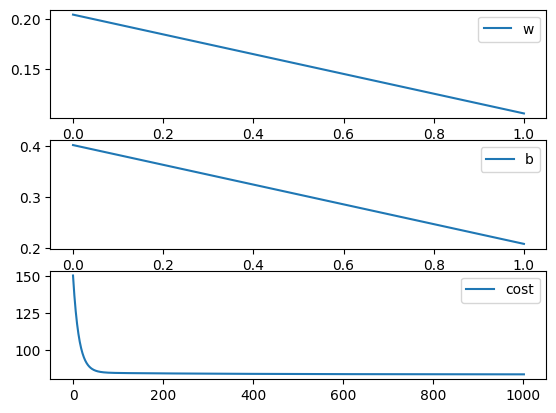

In [9]:
#%% performance
f1 = plt.figure(1)
f1.add_subplot(3,1,1)
plt.plot(p_history[:][0],label = 'w')
plt.legend()
f1.add_subplot(3,1,2)
plt.plot(p_history[:][1],label='b')
plt.legend()
f1.add_subplot(3,1,3)
plt.plot(J_history,label = 'cost')
plt.legend()


In the above plot, although parameters w and b can be seen gradually reducing but the cost is already converged.
Since it is not possible to predict the values accurately through a linear model, the cost will never be cloe to 0. So, as a simple rule, the cost is considered to be converged when the difference of cost in consequtive iterations becomes less than $1.0e-7$.

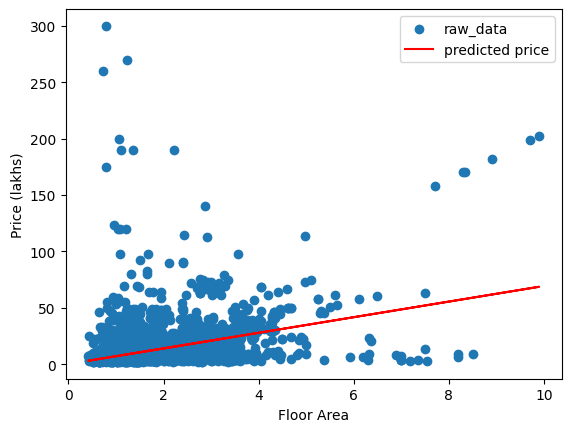

In [10]:
#%% fit
plt.scatter(train_x,train_y,label = 'raw_data')  
plt.plot(train_x,predicted_y(train_x),color = 'r',label='predicted price')
plt.ylabel('Price (lakhs)') 
plt.xlabel('Floor Area')
plt.legend() 

### Summary
Linear regression is a statistical method used to model the linear relationship between a dependent variable and one or more independent variables. In this scenario, the data (area vs price) was used to derive a function that could be used to make predictions about the price of a property based on its area. A cost function was calculated and minimized using gradient descent to optimize the main prediction function. The final result is a linear regression model that can be used to make predictions about property prices based on their area.